# Apache Spark Koalas

Koalas es la librería de Spark-Databricks que permite manipular datos con funcionalidades análogas a Pandas

Este notebook contiene las funciones principales de Koalas, obtenidas de la documentación oficial de https://koalas.readthedocs.io/

In [1]:
# Para poder usar Koalas, debemos instalar las siguientes librerias:
#!pip install databricks
#!pip install koalas

In [2]:
import databricks.koalas as ks

In [3]:
import pandas as pd
import numpy as np

import sys
sys.executable

'/bin/python3'

In [4]:
import findspark
import pyspark
from pyspark.sql import SparkSession

### 1. Creación de objetos



Creando una serie Koalas pasando una lista de valores, permitiendo que Koalas cree un índice entero predeterminado:

In [5]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creando un Koalas DataFrame pasando un dict de objetos que se pueden convertir a series.

In [7]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [8]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creando un DataFrame de pandas pasando una matriz numpy, con un índice de fecha y hora y columnas etiquetadas:

In [9]:
dates = pd.date_range('2013-01-01', periods=6)

In [10]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [12]:
pdf

,A,B,C,D
2013-01-01,-2.505954,-0.168115,0.454567,-0.368192
2013-01-02,0.122148,-1.674878,-0.618458,0.724353
2013-01-03,-0.248612,-0.251874,-0.729320,0.320991
2013-01-04,-1.046840,0.556527,0.968729,0.753692
2013-01-05,-1.198024,0.505000,-1.478435,0.025410
2013-01-06,-0.592066,1.362899,-1.129664,-1.325527


Ahora, este DataFrame de pandas se puede convertir en un DataFrame de Koalas

In [13]:
kdf = ks.from_pandas(pdf)

In [14]:
type(kdf)

databricks.koalas.frame.DataFrame

Sin embargo, se ve y se comporta igual que un DataFrame de pandas

In [15]:
kdf

,A,B,C,D
2013-01-01,-2.505954,-0.168115,0.454567,-0.368192
2013-01-02,0.122148,-1.674878,-0.618458,0.724353
2013-01-03,-0.248612,-0.251874,-0.729320,0.320991
2013-01-04,-1.046840,0.556527,0.968729,0.753692
2013-01-05,-1.198024,0.505000,-1.478435,0.025410
2013-01-06,-0.592066,1.362899,-1.129664,-1.325527


Además, es posible crear un **Koalas DataFrame desde Spark DataFrame**.

Creando un Spark DataFrame a partir de pandas DataFrame

In [16]:
spark = SparkSession.builder.getOrCreate()

In [17]:
sdf = spark.createDataFrame(pdf)

In [18]:
sdf.show()

+--------------------+--------------------+-------------------+-------------------+
|                   A|                   B|                  C|                  D|
+--------------------+--------------------+-------------------+-------------------+
|  -2.505953827330935|-0.16811480758704428|0.45456660363275037|-0.3681918435492133|
| 0.12214791913156388| -1.6748784191068127|-0.6184583828847123| 0.7243533673425241|
|-0.24861157158749814|-0.25187414094147703| -0.729320424114636| 0.3209908743309761|
| -1.0468395663588197|  0.5565274192260629| 0.9687290431417557| 0.7536924921253514|
| -1.1980243754850486|  0.5049999278829082|-1.4784350411309592|0.02541002615071033|
| -0.5920655720737701|  1.3628991443503466|-1.1296636993091353| -1.325526858704222|
+--------------------+--------------------+-------------------+-------------------+



Creando Koalas DataFrame desde Spark DataFrame.
`to_koalas ()` se adjunta automáticamente a Spark DataFrame y está disponible como una API cuando se importa Koalas.

In [19]:
kdf = sdf.to_koalas()

In [20]:
kdf

,A,B,C,D
0,-2.505954,-0.168115,0.454567,-0.368192
1,0.122148,-1.674878,-0.618458,0.724353
2,-0.248612,-0.251874,-0.729320,0.320991
3,-1.046840,0.556527,0.968729,0.753692
4,-1.198024,0.505000,-1.478435,0.025410
5,-0.592066,1.362899,-1.129664,-1.325527


In [21]:
kdf.iloc[[2]]

,A,B,C,D
2,-0.248612,-0.251874,-0.72932,0.320991


Tiene [dtypes] específicos. Actualmente se admiten los tipos que son comunes a Spark y pandas.

In [22]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

### 2. Manipulación de datos


A diferencia de los pandas, los datos en un dataframe de datos de Spark no están _ordenados_, no tienen una noción intrínseca de índice. Cuando se le solicite el encabezado, Spark solo tomará el número solicitado de filas de una partición. **No hay que utilizar el df de Koalas para devolver filas específicas**, use `.loc` o` iloc` en su lugar.

In [23]:
kdf.head()

,A,B,C,D
0,-2.505954,-0.168115,0.454567,-0.368192
1,0.122148,-1.674878,-0.618458,0.724353
2,-0.248612,-0.251874,-0.729320,0.320991
3,-1.046840,0.556527,0.968729,0.753692
4,-1.198024,0.505000,-1.478435,0.025410


Muestre el índice, las columnas y los datos numéricos subyacentes.

También puede recuperar el índice; la columna de índice se puede atribuir a un DataFrame, ver más adelante

In [24]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [25]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
kdf.to_numpy()

array([[-2.50595383, -0.16811481,  0.4545666 , -0.36819184],
       [ 0.12214792, -1.67487842, -0.61845838,  0.72435337],
       [-0.24861157, -0.25187414, -0.72932042,  0.32099087],
       [-1.04683957,  0.55652742,  0.96872904,  0.75369249],
       [-1.19802438,  0.50499993, -1.47843504,  0.02541003],
       [-0.59206557,  1.36289914, -1.1296637 , -1.32552686]])

**Describe** muestra un resumen estadístico rápido de sus datos

In [27]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.911558,0.054927,-0.422097,0.021788
std,0.922235,1.029666,0.943650,0.785641
min,-2.505954,-1.674878,-1.478435,-1.325527
25%,-1.198024,-0.251874,-1.129664,-0.368192
50%,-1.046840,-0.168115,-0.729320,0.025410
75%,-0.248612,0.556527,0.454567,0.724353
max,0.122148,1.362899,0.968729,0.753692


Transposición de sus datos

In [28]:
kdf.T

,0,1,2,3,4,5
A,-2.505954,0.122148,-0.248612,-1.046840,-1.198024,-0.592066
B,-0.168115,-1.674878,-0.251874,0.556527,0.505000,1.362899
C,0.454567,-0.618458,-0.729320,0.968729,-1.478435,-1.129664
D,-0.368192,0.724353,0.320991,0.753692,0.025410,-1.325527


Ordenando por su índice

In [29]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,-0.592066,1.362899,-1.129664,-1.325527
4,-1.198024,0.505000,-1.478435,0.025410
3,-1.046840,0.556527,0.968729,0.753692
2,-0.248612,-0.251874,-0.729320,0.320991
1,0.122148,-1.674878,-0.618458,0.724353
0,-2.505954,-0.168115,0.454567,-0.368192


Ordenar por valor

In [30]:
kdf.sort_values(by='B')

,A,B,C,D
1,0.122148,-1.674878,-0.618458,0.724353
2,-0.248612,-0.251874,-0.729320,0.320991
0,-2.505954,-0.168115,0.454567,-0.368192
4,-1.198024,0.505000,-1.478435,0.025410
3,-1.046840,0.556527,0.968729,0.753692
5,-0.592066,1.362899,-1.129664,-1.325527


### 3. Datos faltantes
Koalas utiliza principalmente el valor `np.nan` para representar los datos faltantes. Por defecto, no se incluye en los cálculos.


In [31]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])
pdf1

,A,B,C,D,E
2013-01-01,-2.505954,-0.168115,0.454567,-0.368192,NaN
2013-01-02,0.122148,-1.674878,-0.618458,0.724353,NaN
2013-01-03,-0.248612,-0.251874,-0.729320,0.320991,NaN
2013-01-04,-1.046840,0.556527,0.968729,0.753692,NaN


In [32]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1
pdf1

,A,B,C,D,E
2013-01-01,-2.505954,-0.168115,0.454567,-0.368192,1.0
2013-01-02,0.122148,-1.674878,-0.618458,0.724353,1.0
2013-01-03,-0.248612,-0.251874,-0.729320,0.320991,NaN
2013-01-04,-1.046840,0.556527,0.968729,0.753692,NaN


In [33]:
kdf1 = ks.from_pandas(pdf1)
kdf1

,A,B,C,D,E
2013-01-01,-2.505954,-0.168115,0.454567,-0.368192,1.0
2013-01-02,0.122148,-1.674878,-0.618458,0.724353,1.0
2013-01-03,-0.248612,-0.251874,-0.729320,0.320991,NaN
2013-01-04,-1.046840,0.556527,0.968729,0.753692,NaN


Para eliminar las filas que tienen datos faltantes.

In [34]:
# Eliminamos registros (filas) con algun dato faltante
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-2.505954,-0.168115,0.454567,-0.368192,1.0
2013-01-02,0.122148,-1.674878,-0.618458,0.724353,1.0


Llenando los datos faltantes.

In [35]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-2.505954,-0.168115,0.454567,-0.368192,1.0
2013-01-02,0.122148,-1.674878,-0.618458,0.724353,1.0
2013-01-03,-0.248612,-0.251874,-0.729320,0.320991,5.0
2013-01-04,-1.046840,0.556527,0.968729,0.753692,5.0


### 4. Operaciones

#### Estadísticas
Las operaciones en general excluyen los datos faltantes.

Realización de una estadística descriptiva:

In [36]:
kdf.mean()

A   -0.911558
B    0.054927
C   -0.422097
D    0.021788
dtype: float64

#### Configuraciones de Spark

Varias configuraciones en PySpark se pueden aplicar internamente en Koalas.
Por ejemplo, puede habilitar la optimización de Arrow para acelerar enormemente la conversión de pandas internos.

In [37]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [38]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

203 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

1.42 s ± 659 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

#### Agrupación
Por "agrupar por" nos referimos a un proceso que involucra uno o más de los siguientes pasos:

- Dividir los datos en grupos según algunos criterios.
- Aplicar una función a cada grupo de forma independiente
- Combinar los resultados en una estructura de datos

In [41]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [42]:
kdf

,A,B,C,D
0,foo,one,0.260989,-0.285949
1,bar,one,-0.098738,0.382733
2,foo,two,1.138499,0.653329
3,bar,three,-0.484742,1.555685
4,foo,two,-0.319730,0.011909
5,bar,two,-1.026875,1.737013
6,foo,one,-0.743785,1.217138
7,foo,three,-1.500566,1.298549


Agrupar y luego aplicar el **sum** a los grupos resultantes.

In [43]:
kdf.groupby('A').sum()

,C,D
A,,
foo,-1.164593,2.894976
bar,-1.610355,3.675430


In [44]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one   -0.482796  0.931189
bar one   -0.098738  0.382733
foo two    0.818769  0.665238
bar three -0.484742  1.555685
    two   -1.026875  1.737013
foo three -1.500566  1.298549

### 5. Visualización de datos: Generar gráficos


In [45]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [46]:
kser = ks.Series(pser)

In [47]:
kser = kser.cummax()
kser.head()

2000-01-01   -0.284035
2000-01-02    1.087232
2000-01-03    1.087232
2000-01-04    1.087232
2000-01-05    1.087232
dtype: float64

**Gráficos de matplotlib**

<AxesSubplot:>

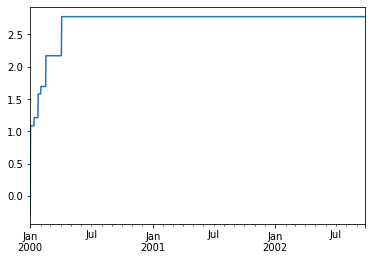

In [48]:
ks.options.plotting.backend = "matplotlib"

kser.plot()

**Gráficos de Pandas Bokeh**

In [49]:
ks.options.plotting.backend = "pandas_bokeh"

kdf.plot(backend="pandas_bokeh", title="Example Figure")
kser.plot()


Figure(id='1235', ...)

**Gráfico por defecto con plotly**

In [50]:
kser.plot()

Figure(id='1580', ...)

En un DataFrame, el plot() es una conveniencia para trazar todas las columnas con etiquetas:

In [51]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [52]:
kdf = ks.from_pandas(pdf)

In [53]:
kdf = kdf.cummax()
kdf.head()

,A,B,C,D
2000-01-01,-0.153192,-0.771251,0.590694,0.883455
2000-01-02,-0.153192,-0.356227,0.590694,0.883455
2000-01-03,0.506346,-0.356227,0.590694,2.096020
2000-01-04,0.506346,-0.356227,0.590694,2.096020
2000-01-05,0.506346,0.733968,0.590694,2.096020


In [54]:
kdf.plot()

Figure(id='1925', ...)

### 6. Entrada / salida de datos


### CSV

CSV es sencillo y fácil de usar

In [55]:
kdf.to_csv('./saved_data_koalas/foo.csv')
ks.read_csv('./saved_data_koalas/foo.csv').head(10)

,A,B,C,D
0,-0.153192,-0.771251,0.590694,0.883455
1,-0.153192,-0.356227,0.590694,0.883455
2,0.506346,-0.356227,0.590694,2.096020
3,0.506346,-0.356227,0.590694,2.096020
4,0.506346,0.733968,0.590694,2.096020
5,0.506346,0.733968,1.241589,2.096020
6,0.506346,0.733968,1.241589,2.096020
7,1.497550,1.845368,1.241589,2.096020
8,1.497550,1.845368,1.241589,2.096020
9,1.497550,1.845368,1.241589,2.096020


### Parquet

Parquet es un formato de archivo eficiente y compacto para leer y escribir más rápido.

In [56]:
kdf.to_parquet('./saved_data_koalas/bar.parquet')
ks.read_parquet('./saved_data_koalas/bar.parquet').head(10)

,A,B,C,D
0,-0.153192,-0.771251,0.590694,0.883455
1,-0.153192,-0.356227,0.590694,0.883455
2,0.506346,-0.356227,0.590694,2.096020
3,0.506346,-0.356227,0.590694,2.096020
4,0.506346,0.733968,0.590694,2.096020
5,0.506346,0.733968,1.241589,2.096020
6,0.506346,0.733968,1.241589,2.096020
7,1.497550,1.845368,1.241589,2.096020
8,1.497550,1.845368,1.241589,2.096020
9,1.497550,1.845368,1.241589,2.096020


### Spark IO

Además, Koalas es totalmente compatible con las diversas fuentes de datos de Spark, como ORC y una fuente de datos externa.

In [57]:
kdf.to_spark_io('./saved_data_koalas/zoo.orc', format="orc")
ks.read_spark_io('./saved_data_koalas/zoo.orc', format="orc").head(10)

,A,B,C,D
0,-0.153192,-0.771251,0.590694,0.883455
1,-0.153192,-0.356227,0.590694,0.883455
2,0.506346,-0.356227,0.590694,2.096020
3,0.506346,-0.356227,0.590694,2.096020
4,0.506346,0.733968,0.590694,2.096020
5,0.506346,0.733968,1.241589,2.096020
6,0.506346,0.733968,1.241589,2.096020
7,1.497550,1.845368,1.241589,2.096020
8,1.497550,1.845368,1.241589,2.096020
9,1.497550,1.845368,1.241589,2.096020


In [58]:
spark.stop()